## Genera en python una secuencia de 10000 números aleatorios a través del método de congruencia lineal

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Queremos crear la siguiente secuencia de números en python. Para esto vamos a escribir la formula $X_{i+1}=(aX_{i}+c) \mod m$

In [27]:
def secuancia_pseudoaleatoria(x_0,a,c,m,n):
    
    Secuencia=[]
    for i in range(n):
        x_i=((a*x_0+c)%m)
        Secuencia.append(x_i/float(m))
        x_0=x_i
    return Secuencia

##
x_0 = 2020
m = 2**31+3
a = 2**16+1
c = 0
n = 10000

sim_1=secuancia_pseudoaleatoria(x_0,a,c,m,n)


# Create a histogram with more bins for better visualization




### Histograma 

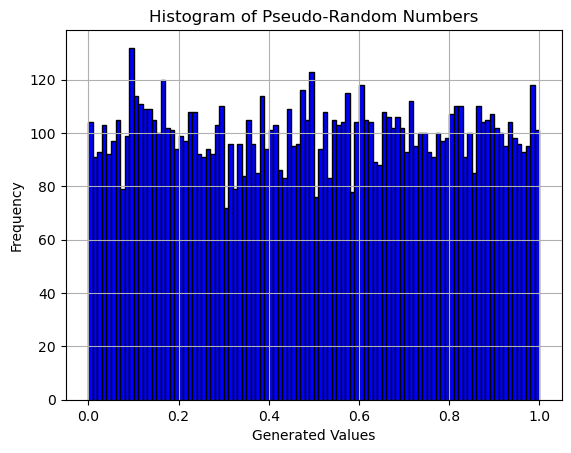

In [29]:
plt.hist(sim_1, bins=100, edgecolor='black', color='blue',range=(0,1))
plt.xlabel('Generated Values')
plt.ylabel('Frequency')
plt.title('Histogram of Pseudo-Random Numbers')
plt.grid(True)
plt.show()
#El autocorrelograma perimite visualizar si los valores se una serie temporal están correlacionados con sus propios valores anteriores en el tiempo.


Vemos que nuestra distribución es muy parecida a una variable uniforme. 

### Autocorrelograma

<Figure size 1000x500 with 0 Axes>

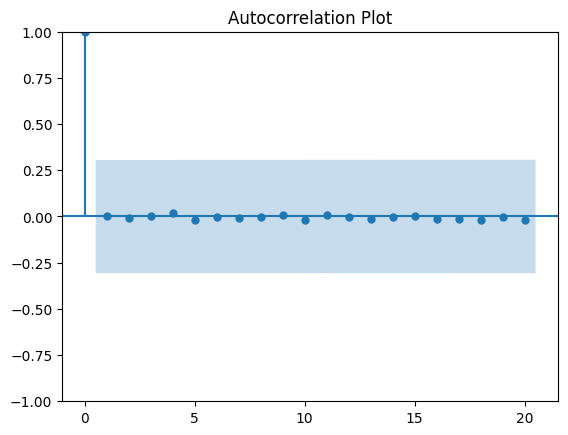

In [8]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf
autocorrelation = acf(sim_1)

plt.figure(figsize=(10, 5))
sm.graphics.tsa.plot_acf(autocorrelation, lags=20, title='Autocorrelation Plot')
plt.show()

Nuestro autocorrelograma presenta un intervalo de confianza del 95 porciento, mostrando que no existe mucha correlación entre las variables, o que los patrones que siguen no se pueden predecir, esto quiere decir que los datos se ven bastante aleatorios.

## Punto 2

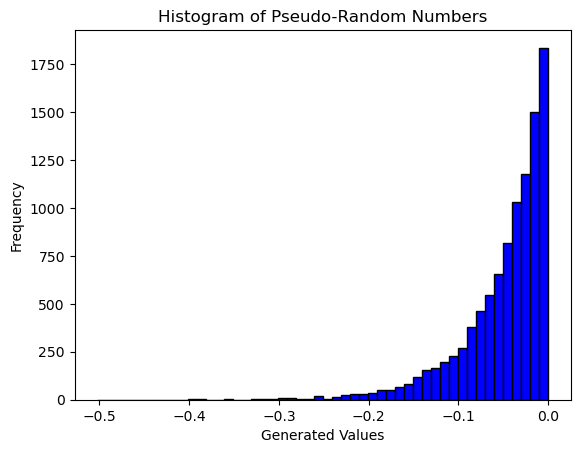

In [60]:
import numpy as np

#a
uniform_variable=np.random.uniform(0,1,10000)
n=10000 # número de variables
x_i=[]
for i in range(n):
    xn=np.log(1-uniform_variable[i])/lambda_param
    x_i.append(xn)  



plt.hist(x_i, bins=50, edgecolor='black', color='blue')
plt.xlabel('Generated Values')
plt.ylabel('Frequency')
plt.title('Histogram of Pseudo-Random Numbers')
plt.show()


<Figure size 1000x500 with 0 Axes>

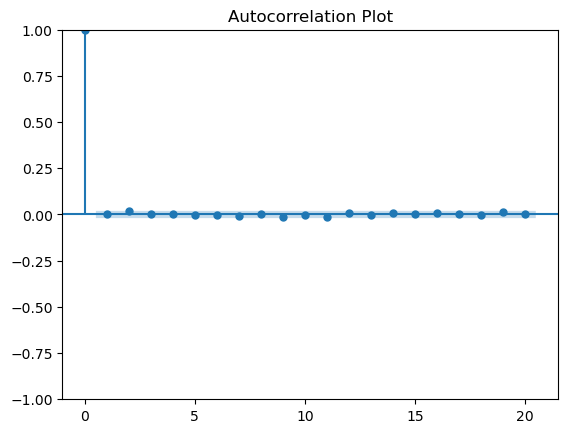

In [61]:

plt.figure(figsize=(10, 5))
sm.graphics.tsa.plot_acf(x_i, lags=20, title='Autocorrelation Plot')
plt.show()

### Punto 3

- Vamos a crear la simulación de las boletas del cine.

Running simulation... 
The average wait time is 14 minutes and 55 seconds.


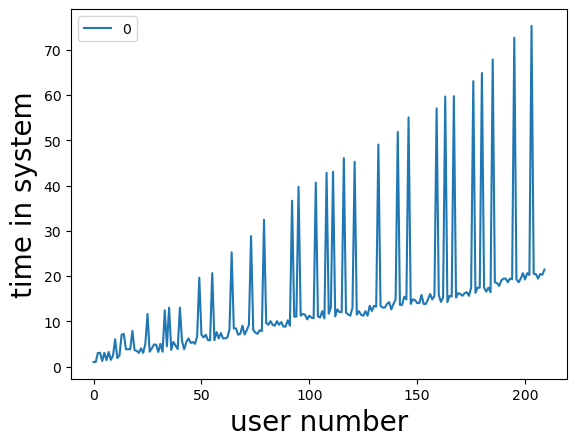

In [96]:
# Adapted from Simpy companion

import simpy
import random
import statistics
import pandas as pd
import matplotlib.pyplot as plt

system_times = []


class Theater(object):
    def __init__(self, env, num_cashiers, num_servers, num_ushers):
        self.env = env
        self.cashier = simpy.Resource(env, num_cashiers)
        self.server = simpy.Resource(env, num_servers)
        self.usher = simpy.Resource(env, num_ushers)

    def purchase_ticket(self, moviegoer):
        yield self.env.timeout(random.randint(1, 3))

    def sell_food(self, moviegoer):
        yield self.env.timeout(random.randint(1, 5))

    def check_ticket(self, moviegoer):
        yield self.env.timeout(3 / 60)

    

def go_to_movies(env, moviegoer, theater):
    # Moviegoer arrives at the theater
    arrival_time = env.now

    with theater.cashier.request() as request:
        yield request
        yield env.process(theater.purchase_ticket(moviegoer))

    if random.choice([True, False]):
        with theater.server.request() as request:
            yield request
            yield env.process(theater.sell_food(moviegoer))

    with theater.usher.request() as request:
        yield request
        yield env.process(theater.check_ticket(moviegoer))

    
    # Moviegoer heads into the theater
    system_times.append(env.now - arrival_time)


def run_theater(env, num_cashiers, num_servers, num_ushers):
    theater = Theater(env, num_cashiers, num_servers, num_ushers)

    for moviegoer in range(3):
        env.process(go_to_movies(env, moviegoer, theater))
        #print("movie goer:",moviegoer)

    while True:
        yield env.timeout(0.20)  # Wait a bit before generating a new person

        moviegoer += 1
        env.process(go_to_movies(env, moviegoer, theater))
        #print("movie goer:",moviegoer)


def get_average_wait_time(wait_times):
    average_wait = statistics.mean(wait_times)
    # Pretty print the results
    minutes, frac_minutes = divmod(average_wait, 1)
    seconds = frac_minutes * 60
    return round(minutes), round(seconds)


def main():
    # Setup

    random.seed(42)
    num_cashiers = 8
    num_servers = 1
    num_ushers = 1

    # Run the simulation
    env = simpy.Environment()
    env.process(run_theater(env, num_cashiers, num_servers, num_ushers))
    env.run(until=90)

    # View the results
    mins, secs = get_average_wait_time(system_times)
    print(
        "Running simulation...",
        f"\nThe average wait time is {mins} minutes and {secs} seconds.",
    )

    # Save the results
    df = pd.DataFrame(system_times)
    df.to_csv("system_times.csv")
    
    # Display the results 
    df.plot()
    plt.xlabel('user number', fontsize=20)
    plt.ylabel('time in system', fontsize=20)
    plt.show()


    
if __name__ == "__main__":
    main()




## Simulación Para varios valores de personas

In [136]:
num_cashiers_values = range(1,10)  # Change these ranges as needed
num_servers_values = range(1, 10)
num_ushers_values = range(1, 10)

results = []

for num_cashiers in num_cashiers_values:
    for num_servers in num_servers_values:
        for num_ushers in num_ushers_values:
            #Wee do the simulation only for values that perform this equation" x+y+z=10"
            if num_cashiers+num_servers+num_ushers==10:

                # Initialize system_times for the current combination
                system_times = []

                random.seed(42)


                # Run the simulation for the current combination of values
                env = simpy.Environment()
                env.process(run_theater(env, num_cashiers, num_servers, num_ushers))
                env.run(until=90)

                # Calculate the average wait time
                mins, secs = get_average_wait_time(system_times)

                # Append the results to the list
                results.append({
                    "Num_Cashiers": num_cashiers,
                    "Num_Servers": num_servers,
                    "Num_Ushers": num_ushers,
                    "Average_Wait_Minutes": mins,
                    "Average_Wait_Seconds": secs
                })

                # Display and save the results
                print(
                    "Running simulation...",
                    f"Num Cashiers: {num_cashiers}, Num Servers: {num_servers}, Num Ushers: {num_ushers}",
                    f"\nThe average wait time is {mins} minutes and {secs} seconds.",
                    )

    # Create a DataFrame from the results
    df = pd.DataFrame(results)



Running simulation... Num Cashiers: 1, Num Servers: 1, Num Ushers: 8 
The average wait time is 41 minutes and 51 seconds.
Running simulation... Num Cashiers: 1, Num Servers: 2, Num Ushers: 7 
The average wait time is 40 minutes and 43 seconds.
Running simulation... Num Cashiers: 1, Num Servers: 3, Num Ushers: 6 
The average wait time is 40 minutes and 43 seconds.
Running simulation... Num Cashiers: 1, Num Servers: 4, Num Ushers: 5 
The average wait time is 40 minutes and 43 seconds.
Running simulation... Num Cashiers: 1, Num Servers: 5, Num Ushers: 4 
The average wait time is 40 minutes and 43 seconds.
Running simulation... Num Cashiers: 1, Num Servers: 6, Num Ushers: 3 
The average wait time is 40 minutes and 43 seconds.
Running simulation... Num Cashiers: 1, Num Servers: 7, Num Ushers: 2 
The average wait time is 40 minutes and 43 seconds.
Running simulation... Num Cashiers: 1, Num Servers: 8, Num Ushers: 1 
The average wait time is 40 minutes and 44 seconds.
Running simulation... Nu

In [137]:
#Creamos una columna nueva llamada Total_minutes que convierte todo a minutos.
df['Total_minutes']=df['Average_Wait_Minutes']+df['Average_Wait_Seconds']/60


In [138]:
#Encontramos el máximo y el mínimo de los tiempos de espera y los guardas en un dataframe
df_min=df[df['Total_minutes']==df['Total_minutes'].min()]

df_max=df[df['Total_minutes']==df['Total_minutes'].max()]

#retornamos las columnas donde la suma de Nu_Cashiers, Num_Servers y Num_Ushers es más pequeña
df_min['Sum_Personal']=df_min['Num_Cashiers']+df_min['Num_Servers']+df_min['Num_Ushers']


df_min_optimum=df_min[df_min['Sum_Personal']==df_min['Sum_Personal'].min()]
df_min_optimum




C:\Users\David\AppData\Local\Temp\ipykernel_11280\3551166985.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_min['Sum_Personal']=df_min['Num_Cashiers']+df_min['Num_Servers']+df_min['Num_Ushers']


,Num_Cashiers,Num_Servers,Num_Ushers,Average_Wait_Minutes,Average_Wait_Seconds,Total_minutes,Sum_Personal
35,8,1,1,14,55,14.916667,10


In [111]:
df.describe()

,Num_Cashiers,Num_Servers,Num_Ushers,Average_Wait_Minutes,Average_Wait_Seconds,Total_minutes
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000
mean,15.886792,6.056604,6.056604,5.849057,29.547170,6.341509
std,2.446822,2.340407,2.340407,2.413075,12.754435,2.455977
min,10.000000,1.000000,1.000000,3.000000,3.000000,3.400000
25%,14.000000,4.000000,4.000000,4.000000,20.000000,4.283333
50%,16.000000,6.000000,6.000000,6.000000,36.000000,6.566667
75%,18.000000,8.000000,8.000000,8.000000,39.000000,8.616667
max,19.000000,9.000000,9.000000,10.000000,54.000000,10.166667
